# packages

In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [2]:
figwidth = 12
figheight = 8
barlabelsize = 18
fig_color = "0.8"

# imports

In [1]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from textwrap import wrap


In [2]:
params = {'legend.fontsize': 'x-large',
        'axes.labelsize':'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large',
        'font.size': 13}
for key in params:
        plt.rcParams[key] = params[key]

# Config

In [11]:
destination_folder = './target/img/'
fileformat = ".pdf"
input_json = "./target/json/data_consolidated_semistructured.json"

domains = ['Accommodation', 'Electricity', 'Manufacturing',
       'Transportation and Storage']
mdetches = ['Code\n Generation', 'Model\n Interpretation',
       'Model to Model\n Transformation']
trls = ["Solution Proposal \n", "Validation Research \n", "Evaluation Research \n"]
systems= ['Individual Systems', 'Processes', 'Systems of\n Systems']
slcs = ['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test']
tlcs = ['As-Designed',  'As-Operated']
x_rotation = 0
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500, color="0.8")
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, fontsize=30, rotation=x_rotation)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

# JSON Data Preparation

## read data

In [12]:
# dataframes for occurances per MDE technique
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])

# dataframes for comparison TLCP and SLCP
slcp_tlcp = pd.DataFrame(columns = ['value', 'slcp'])

# dataframes for occurances per TRL
tt_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tt_trl = pd.DataFrame(columns = ['value', 'trl'])

# dataframes for uccorances per TRL
ucd_tt = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_tlcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_slcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_trl = pd.DataFrame(columns = ['value', 'use case domain'])

with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
#mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"] if contents["use case domain"] in domains else None

    if twinning_target is None:
        twinning_target = ["No TT"]
    
    if twin_lcp is None:
        twin_lcp = "No TLCP"

    if trl is None:
        trl = "Solution Proposal"

    twin_lcp = contents["twin lifecycle phase"]
    new_line = pd.DataFrame([{"value": twin_lcp, "trl": trl}])
    tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)

    for v in twinning_target:
        new_line = pd.DataFrame([{"value": v, 'use case domain': ucd}])
        ucd_tt = pd.concat([ucd_tt, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": v, "trl": trl}])
        tt_trl = pd.concat([tt_trl, new_line], ignore_index=True)

    new_line = pd.DataFrame([{"value": trl, 'use case domain': ucd}])
    ucd_trl = pd.concat([ucd_trl, new_line], ignore_index=True)

    new_line = pd.DataFrame([{"value": twin_lcp, 'use case domain': ucd}])
    ucd_tlcp = pd.concat([ucd_tlcp, new_line], ignore_index=True)

    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp = mdeContents["system lifecycle phase"]

        if system_lcp is None:
            system_lcp = "No SLCP"

        new_line = pd.DataFrame([{"value": system_lcp, 'use case domain': ucd}])
        ucd_slcp = pd.concat([ucd_slcp, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": ucd, "technique": mdeTech}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeTech}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp, "technique": mdeTech}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp, "technique": mdeTech}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)

        for v in twinning_target:
            new_line = pd.DataFrame([{"value": v, "technique": mdeTech}])
            twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        
        

        if twin_lcp is not None and ";" in twin_lcp:
            for item in twin_lcp.split(';'):
                print(item)
                new_line = pd.DataFrame([{"value": item, "slcp": system_lcp}])
                slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)
        else:
            new_line = pd.DataFrame([{"value": twin_lcp, "slcp": system_lcp}])
            slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)


print(pd.unique(domains_techniques["value"]))

As-Designed
As-Operated
['Manufacturing' 'Transportation and Storage' 'Electricity' None
 'Accommodation']


## postprocessing

In [13]:
mde = [domains_techniques, 
system_lcp_techniques,
twin_lcp_techniques,
twinning_target_techniques,
trl_techniques,]

trl = [tt_trl,
mde_trl,
domain_trl,
slcp_trl,
tlcp_trl,
tt_trl]

domain = [ucd_tt,
ucd_tlcp,
ucd_slcp,
ucd_trl]

i = 0
for item in mde:
    #print(item[i])
    for col in item.columns:
        item1 = item.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
        item1 = item.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64').reset_index()
    i+=1

i = 0
for item in trl:
    for col in item.columns:
        item1 = item.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
        item1 = item.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64').reset_index()
    i+=1

In [14]:
ucd_tt_copy = ucd_tt.__deepcopy__()
ucd_tlcp_copy = ucd_tlcp.__deepcopy__()
ucd_slcp_copy = ucd_slcp.__deepcopy__()
ucd_trl_copy = ucd_trl.__deepcopy__()

ucd_tt_copy = ucd_tt_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_tlcp_copy = ucd_tlcp_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_slcp_copy = ucd_slcp_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_trl_copy = ucd_trl_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')

ucd_slcp_copy.replace(0, np.nan, inplace=True)
ucd_slcp_copy.dropna(axis=1, inplace=True)

In [15]:
domains_techniques_copy = domains_techniques.__deepcopy__()
system_lcp_techniques_copy = system_lcp_techniques.__deepcopy__()
twin_lcp_techniques_copy = twin_lcp_techniques.__deepcopy__()
twinning_target_techniques_copy= twinning_target_techniques.__deepcopy__()
trl_techniques_copy = trl_techniques.__deepcopy__()

domains_techniques_copy = domains_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
system_lcp_techniques_copy = system_lcp_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
twin_lcp_techniques_copy = twin_lcp_techniques_copy.groupby(['technique', 'value']).size()#.unstack().fillna(0).astype('int64')
twinning_target_techniques_copy = twinning_target_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
trl_techniques_copy = trl_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')

trl_techniques_copy = trl_techniques_copy.rename(columns={"Validation Research": "Validation\nResearch", "Evaluation Research": "Evaluation\nResearch", "Solution Proposal": "Solution\nProposal"})
print(trl_techniques_copy)

twin_lcp_techniques_copy['Model Interpretation']['As-Designed;As-Operated'] = 0
twin_lcp_techniques_copy['Model Interpretation']['As-Designed'] += 1
twin_lcp_techniques_copy['Model Interpretation']['As-Operated'] += 1
twin_lcp_techniques_copy.unstack().fillna(0).astype('int64')

twin_lcp_techniques_copy.replace(0, np.nan, inplace=True)
twin_lcp_techniques_copy.dropna(inplace=True)
twin_lcp_techniques_copy = twin_lcp_techniques_copy.astype('int64')

value                          Evaluation\nResearch  Solution\nProposal  \
technique                                                                 
Code Generation                                   6                  20   
Model Interpretation                             13                  16   
Model to Model Transformation                     7                  18   

value                          Validation\nResearch  
technique                                            
Code Generation                                  21  
Model Interpretation                             14  
Model to Model Transformation                    20  


In [16]:
mde_trl_copy = mde_trl.__deepcopy__()
domain_trl_copy = domain_trl.__deepcopy__()
slcp_trl_copy = slcp_trl.__deepcopy__()
tlcp_trl_copy= tlcp_trl.__deepcopy__()
tt_trl_copy = tt_trl.__deepcopy__()

mde_trl_copy = mde_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
domain_trl_copy = domain_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
slcp_trl_copy = slcp_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
tlcp_trl_copy = tlcp_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
tt_trl_copy = tt_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')

mde_trl_copy.columns = ['Code Generation', 'Model\nInterpretation',
       'Model to Model \nTransformation']

tt_trl_copy = tt_trl_copy.rename(columns = {"Individual Systems": "Individual\nSystems", "Systems of Systems": "Systems of\nSystems"})



# Scatterplots for RQ1

## Source/Target Scatterplots

In [17]:
source_target_mde_domain = pd.DataFrame(columns = ['source', 'target', 'mde', 'domain'])
target_categories = pd.DataFrame(columns = ['cat'])
main_categories = pd.DataFrame(columns = ['source'])
twin_system_lcp = pd.DataFrame(columns = ['tlcp', 'slcp'])


with open("./target/json/data_consolidated_semistructured.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    keys = contents.keys()
    if "use case domain" in keys:
        domain = contents["use case domain"]
    else:
        domain = "N/A"
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]
    for index, mdeContents in contents["modelTrafos"].items():
        mdeContents = json.loads(mdeContents)
        src_cat_1 = mdeContents["source category"]
        src_cat_2 = mdeContents["source sub-category 1"]
        src_cat_2_1 = mdeContents["source sub-category 2"]
        src_cat_3 = mdeContents["source model target category"]
        trg_cat_1 = mdeContents["target category"]
        trg_cat_2 = mdeContents["target sub-category 1"]
        trg_cat_2_1 = mdeContents["target sub-category 2"]
        tlcp = contents["twin lifecycle phase"]
        slcp = mdeContents["system lifecycle phase"]
        trg_cat_3 = mdeContents["target model target category"]
        mde_technique = mdeContents["model processing technique"]
        new_line = pd.DataFrame([{"source": src_cat_2, "target": trg_cat_2, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"source": src_cat_2, "target": trg_cat_2_1, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"source": src_cat_2_1, "target": trg_cat_2, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"source": src_cat_2_1, "target": trg_cat_2_1, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": src_cat_3}])
        target_categories = pd.concat([target_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": trg_cat_3}])
        target_categories = pd.concat([target_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": src_cat_1}])
        main_categories = pd.concat([main_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": trg_cat_1}])
        main_categories = pd.concat([main_categories, new_line], ignore_index=True)
        #new_line = pd.DataFrame([{"cat": trg_cat_1_1}])
        #main_categories = pd.concat([main_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"tlcp": tlcp, "slcp": slcp}])
        twin_system_lcp = pd.concat([twin_system_lcp, new_line], ignore_index=True)

#print(source_target_mde_domain[source_target_mde_domain["target"] == "Machine Learning Model"])
#print("#############################")
source_target_mde = source_target_mde_domain.drop("domain", axis=1)
source_target_mtom = source_target_mde[source_target_mde['mde'] == "Model to Model Transformation"]  
source_target_mtom = source_target_mtom.drop("mde", axis=1)
source_target_mtom = source_target_mtom.dropna()
source_target_mtom = source_target_mtom.groupby(["source", "target"]).size().unstack()
source_target_mtom = source_target_mtom.fillna(0).astype(int)
source_target_mtom.to_csv("./data/categorization_modeltomodel.csv", sep=";", index=True)

source_target_mi = source_target_mde[source_target_mde['mde'] == "Model Interpretation"]  
source_target_mi = source_target_mi.dropna()
source_target_mi = source_target_mi.groupby(["source", "target"]).size().unstack()
source_target_mi = source_target_mi.fillna(0).astype(int)
#print(source_target_mi)

source_target_mi.to_csv("./data/categorization_modelinterpretation.csv", sep=";", index=True)

source_target_mtot = source_target_mde[source_target_mde['mde'] == "Code Generation"]  
source_target_mtot = source_target_mtot.dropna()
source_target_mtot = source_target_mtot.groupby(["source", "target"]).size().unstack()
source_target_mtot = source_target_mtot.fillna(0).astype(int)
source_target_mtot.to_csv("./data/categorization_modeltotext.csv", sep=";", index=True)

twin_system_lcp = twin_system_lcp[twin_system_lcp["slcp"].isin(["Design", "Implement", "Operate"])]
twin_system_lcp = twin_system_lcp[twin_system_lcp["tlcp"].isin(["As-Designed", "As-Operated"])]
twin_system_lcp = twin_system_lcp.groupby(["tlcp", "slcp"]).size().unstack()
twin_system_lcp = twin_system_lcp.fillna(0).astype(int)
twin_system_lcp.to_csv("./data/twin_system_lcp.csv", sep=";")

source_target_mde_domain = source_target_mde_domain[source_target_mde_domain["domain"].isin(["Manufacturing", "Accommodation", "Transportation and Storage", "Electricity"])]

# Experimental
source_target_mi = source_target_mde[source_target_mde['mde'] == "Model Interpretation"]  
source_target_mi = source_target_mi.dropna()
source_target_mtot = source_target_mde[source_target_mde['mde'] == "Code Generation"]  
source_target_mtot = source_target_mtot.dropna()
source_target_mtom = source_target_mde[source_target_mde['mde'] == "Model to Model Transformation"]  
source_target_mtot = source_target_mtot.dropna()
models = source_target_mtom["source"] 
models = models.append(source_target_mtom["target"], ignore_index=True)
models = models.append(source_target_mtot["source"], ignore_index=True)
generation_target = source_target_mde[source_target_mde['mde'] == "Code Generation"] 
#generation_target = generation_target[generation_target['target'].isin(software_categories)]
generation_target = generation_target.groupby("target").size()
interpretation_engines = source_target_mde[source_target_mde['mde'] == "Model Interpretation"] 
#interpretation_engines = interpretation_engines[interpretation_engines['target'].isin(software_categories)]
interpretation_engines = interpretation_engines.groupby("target").size()
models.to_csv("./data/model_artefacts.csv", sep=";", index=True)
generation_target.to_csv("./data/generation_targets.csv", sep=";", index=True)
interpretation_engines.to_csv("./data/interpretation_engines.csv", sep=";", index=True)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_11080\2225005270.py:93: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(source_target_mtom["target"], ignore_index=True)
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_11080\2225005270.py:94: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(source_target_mtot["source"], ignore_index=True)


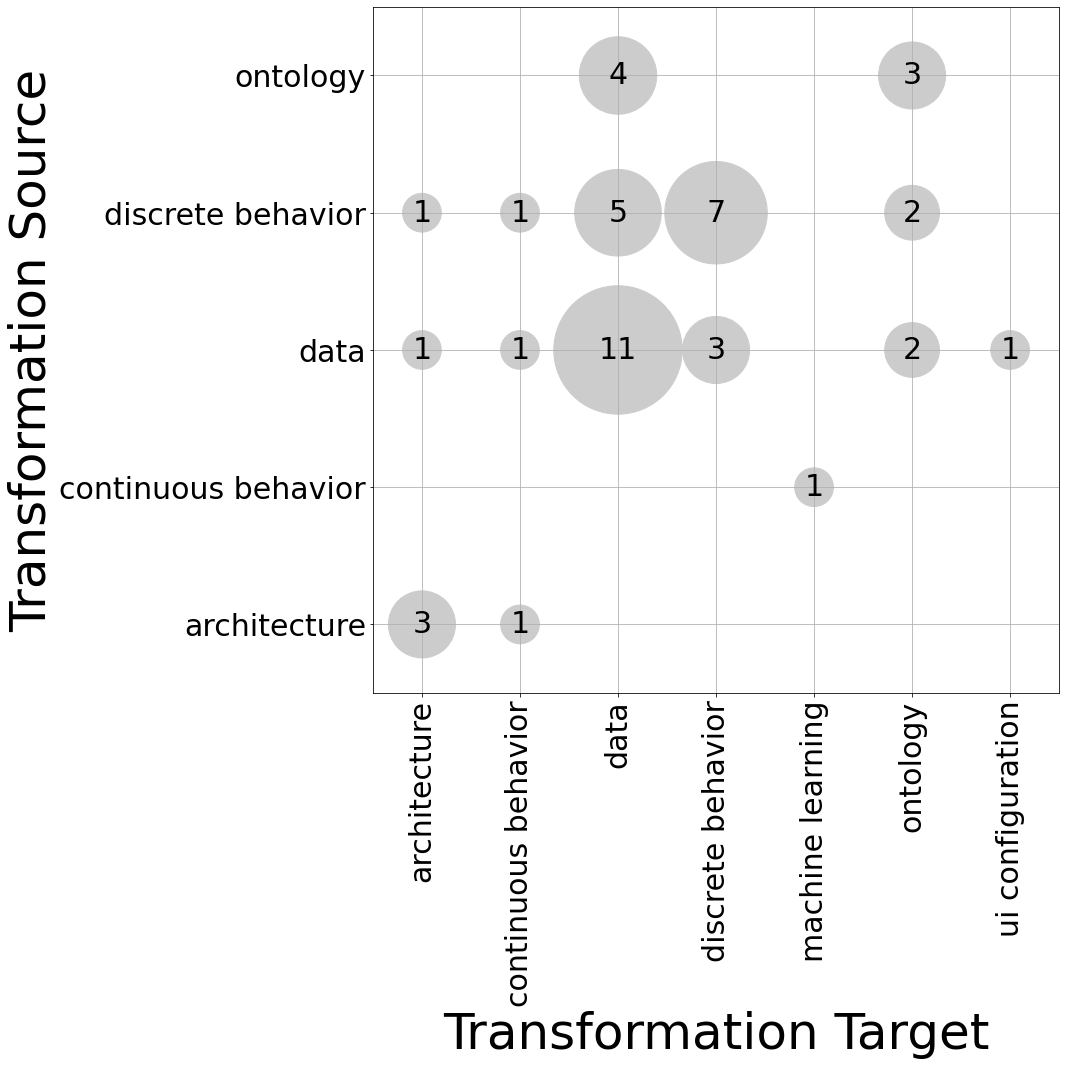

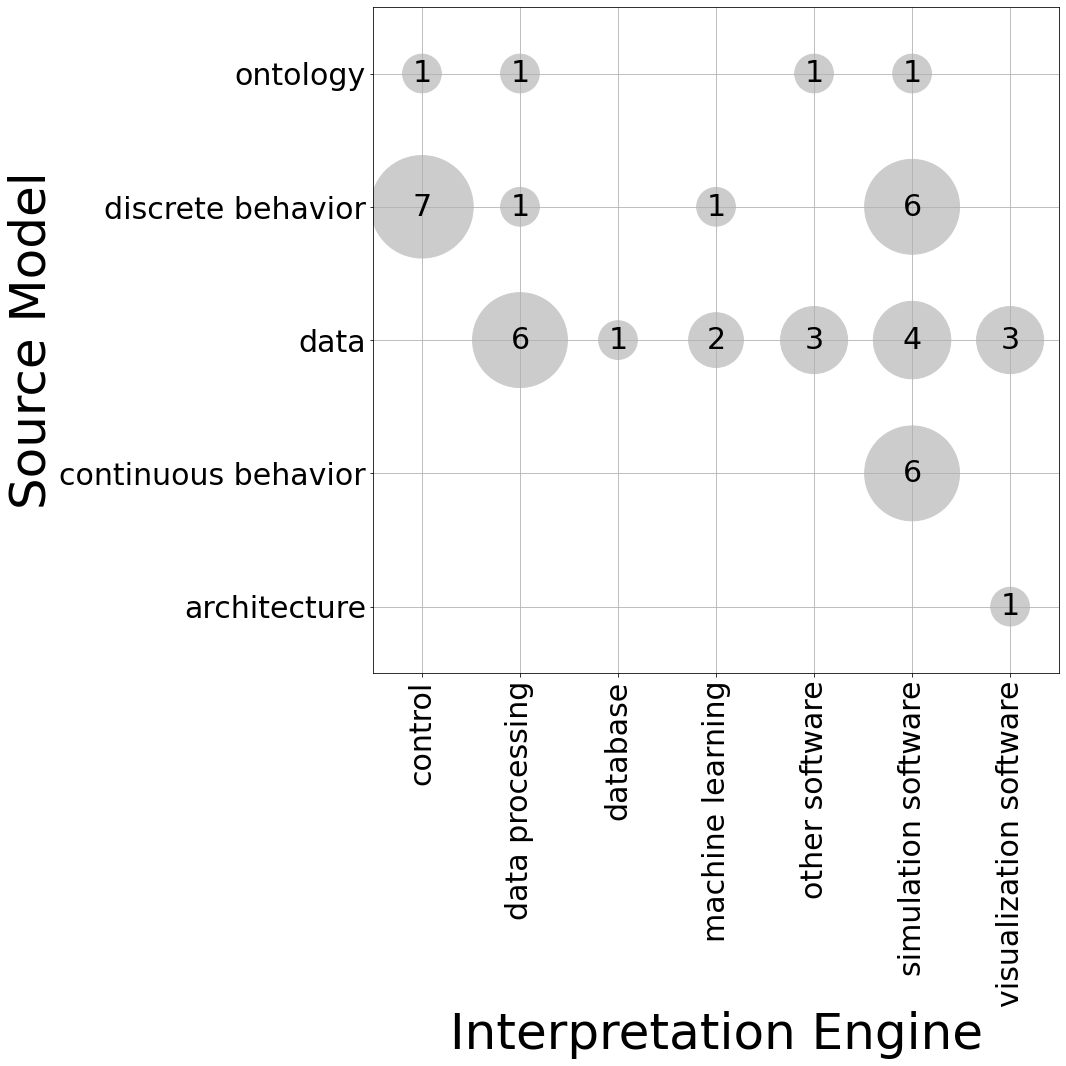

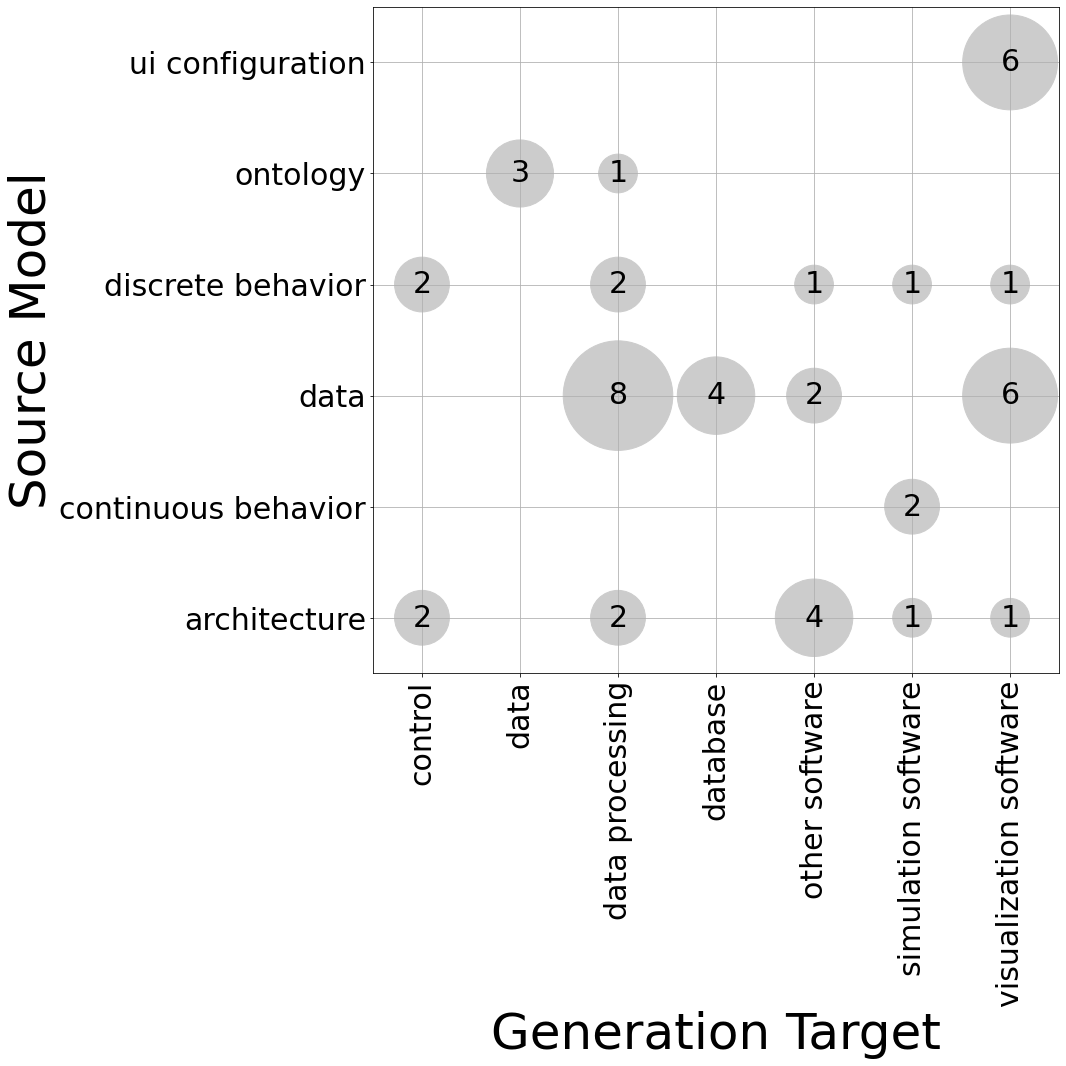

In [18]:
source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
source_target = source_target.transpose()
plt.figure(figsize=(15,15))
size_multiplier = 2500
x_rotation = 90
scatter_for_df(source_target)
plt.xlabel("Transformation Target", fontsize=50)
plt.ylabel("Transformation Source", fontsize=50)
plt.tight_layout()
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 5.5)
plt.savefig(destination_folder + "mde_modeltomodel_scatter.pdf")

source_target = pd.read_csv("./data/categorization_modelinterpretation.csv", sep=";", header=0, index_col = 0)
source_target = source_target.transpose()
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(source_target)
plt.xlabel("Interpretation Engine", fontsize=50)
plt.ylabel("Source Model", fontsize=50)
plt.tight_layout()
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 5.5)
plt.savefig(destination_folder + "mde_modelinterpretation_scatter.pdf")

source_target = pd.read_csv("./data/categorization_modeltotext.csv", sep=";", header=0, index_col = 0)
source_target = source_target.transpose()
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(source_target)
plt.xlabel("Generation Target", fontsize=50)
plt.ylabel("Source Model", fontsize=50)
plt.tight_layout()
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 6.5)
plt.savefig(destination_folder + "mde_modeltotext_scatter.pdf")



## TRL per MDE technique

technique             Code Generation  Model Interpretation  \
value                                                         
Evaluation\nResearch                6                    13   
Solution\nProposal                 20                    16   
Validation\nResearch               21                    14   

technique             Model to Model\nTransformation  
value                                                 
Evaluation\nResearch                               7  
Solution\nProposal                                18  
Validation\nResearch                              20  


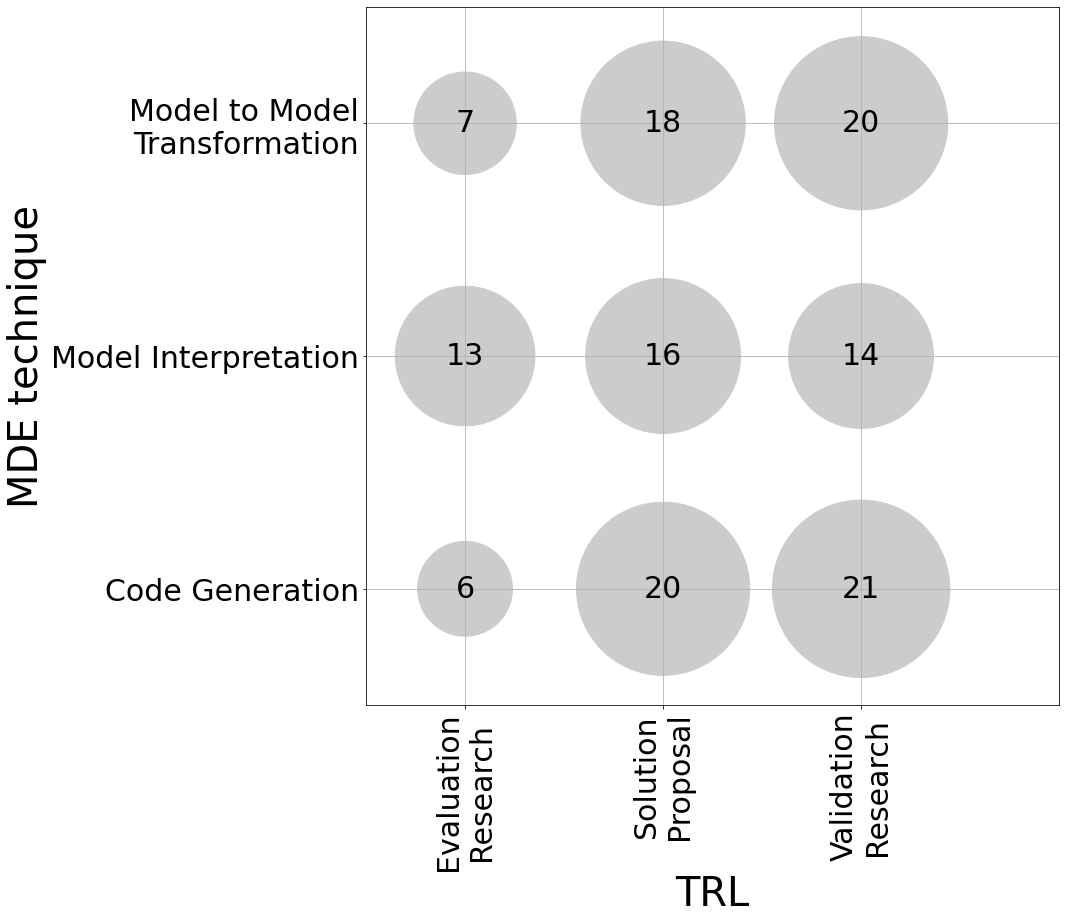

In [19]:
# MDE techniques per TRL
trl_techniques_copy_scatter = trl_techniques_copy.transpose()
trl_techniques_copy_scatter = trl_techniques_copy_scatter.rename(columns = {"Model to Model Transformation": "Model to Model\nTransformation"})
print(trl_techniques_copy_scatter)
plt.figure(figsize=(15,13))
scatter_for_df(trl_techniques_copy_scatter)
plt.ylabel("MDE technique", fontsize=40)
plt.xlabel("TRL", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 4)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "TRL_MDE_scatter" + ".pdf")

# Scatterplots for RQ2

## Twinning Target

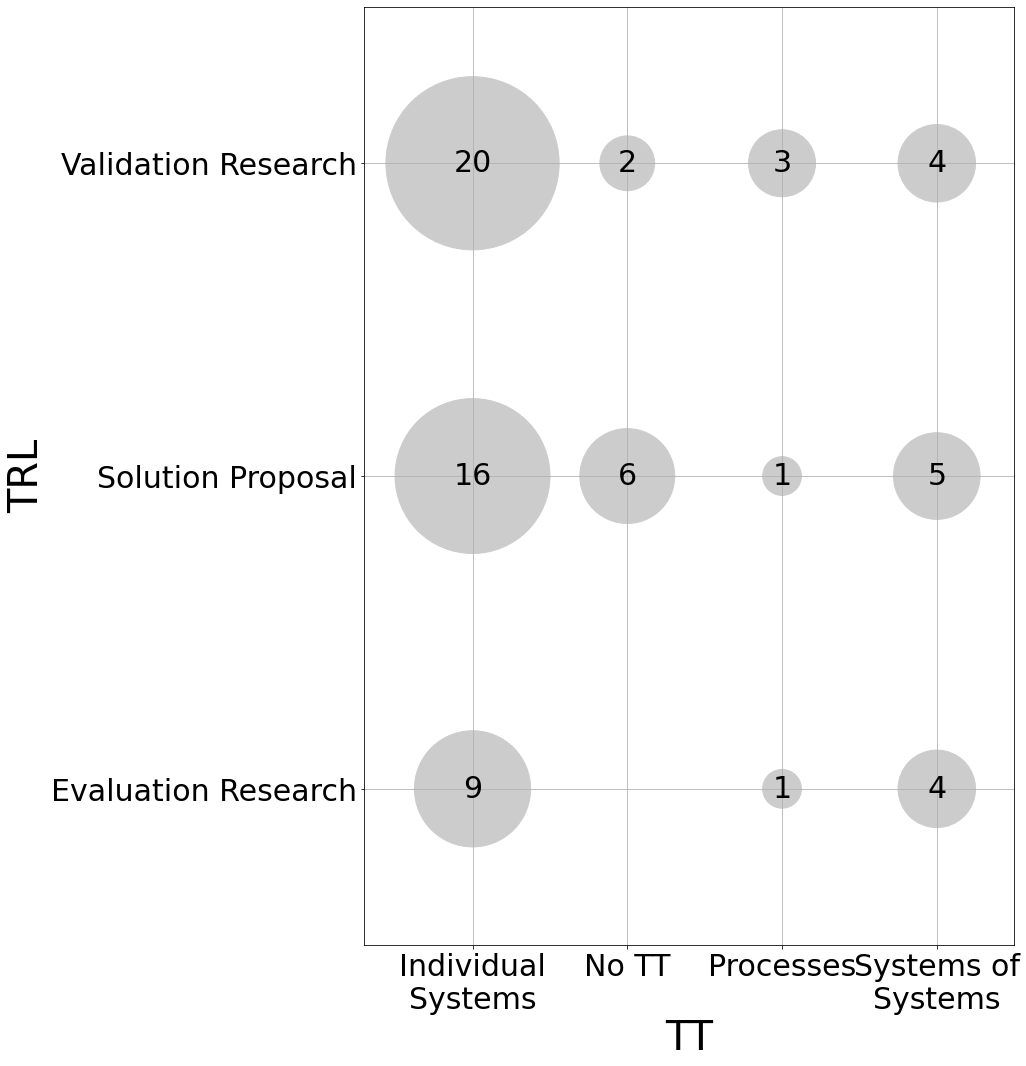

In [20]:
# TRL per TT
x_rotation = 00
tt_trl_copy_scatter = tt_trl_copy.transpose()
#tt_trl_copy_scatter = tt_trl_copy_scatter.replace("Individual Systems", "Test")
plt.figure(figsize=(15,15))
scatter_for_df(tt_trl_copy_scatter)
plt.xlabel("TT", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.3, 4.5)
plt.savefig(destination_folder + "TT_TRL_scatter" + ".pdf")

technique              Code Generation  Model Interpretation  \
value                                                          
Individual \n Systems               30                    41   
No TT                               11                     8   
Processes                            4                     1   
Systems of \n Systems                5                     6   

technique              Model-to-Model \n Transformation  
value                                                    
Individual \n Systems                                26  
No TT                                                 6  
Processes                                             7  
Systems of \n Systems                                10  


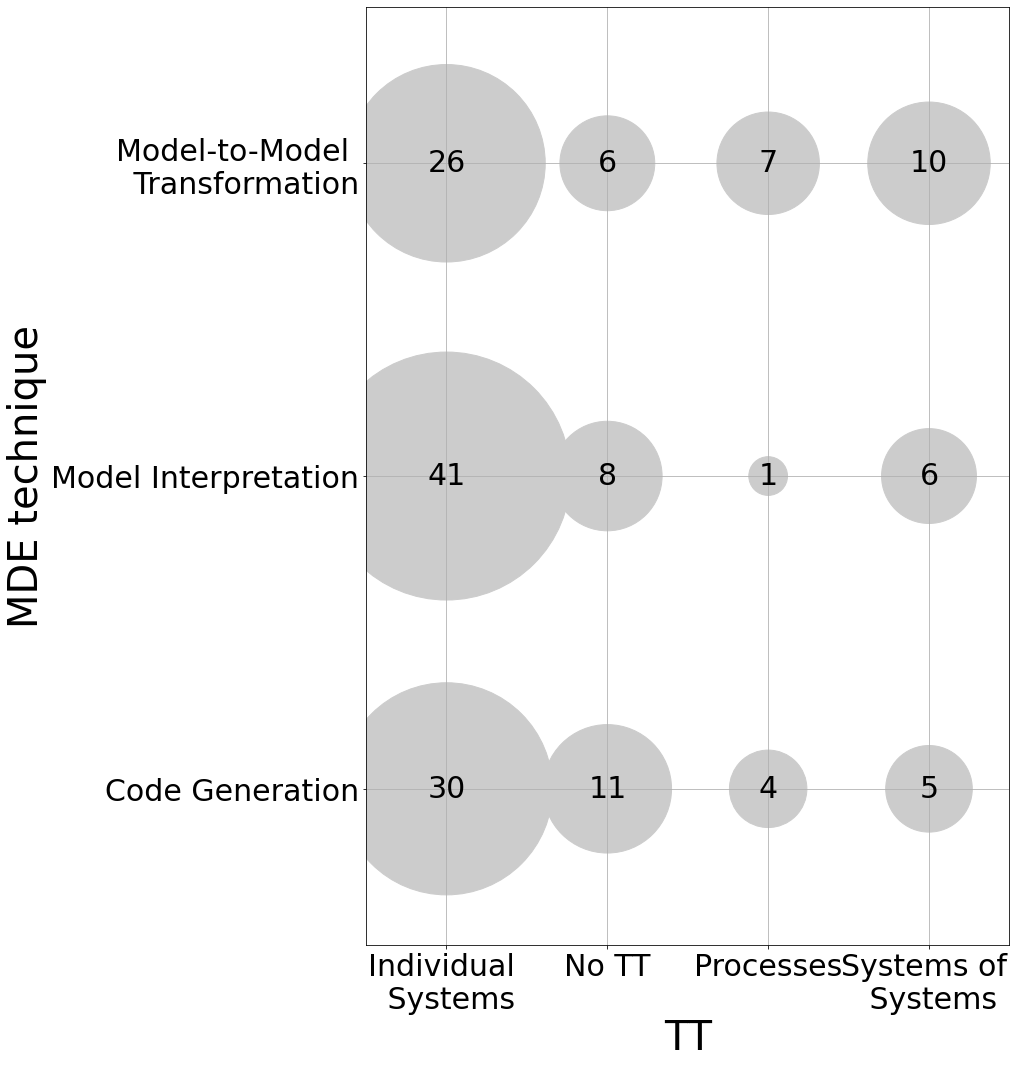

In [21]:

#MDE techniques per TT
twinning_target_techniques_copy_scatter = twinning_target_techniques_copy.transpose()
twinning_target_techniques_copy_scatter = twinning_target_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"}, 
                                                                                         index={"Individual Systems": "Individual \n Systems", "Systems of Systems": "Systems of \n Systems"})
print(twinning_target_techniques_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(twinning_target_techniques_copy_scatter)
plt.xlabel("TT", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 4.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "TT_MDE_scatter" + ".pdf")

## Twin Lifecycle Phase

trl          Evaluation Research  Solution Proposal  Validation Research
value                                                                   
As-Designed                    5                 21                   18
As-Operated                    7                  4                    6


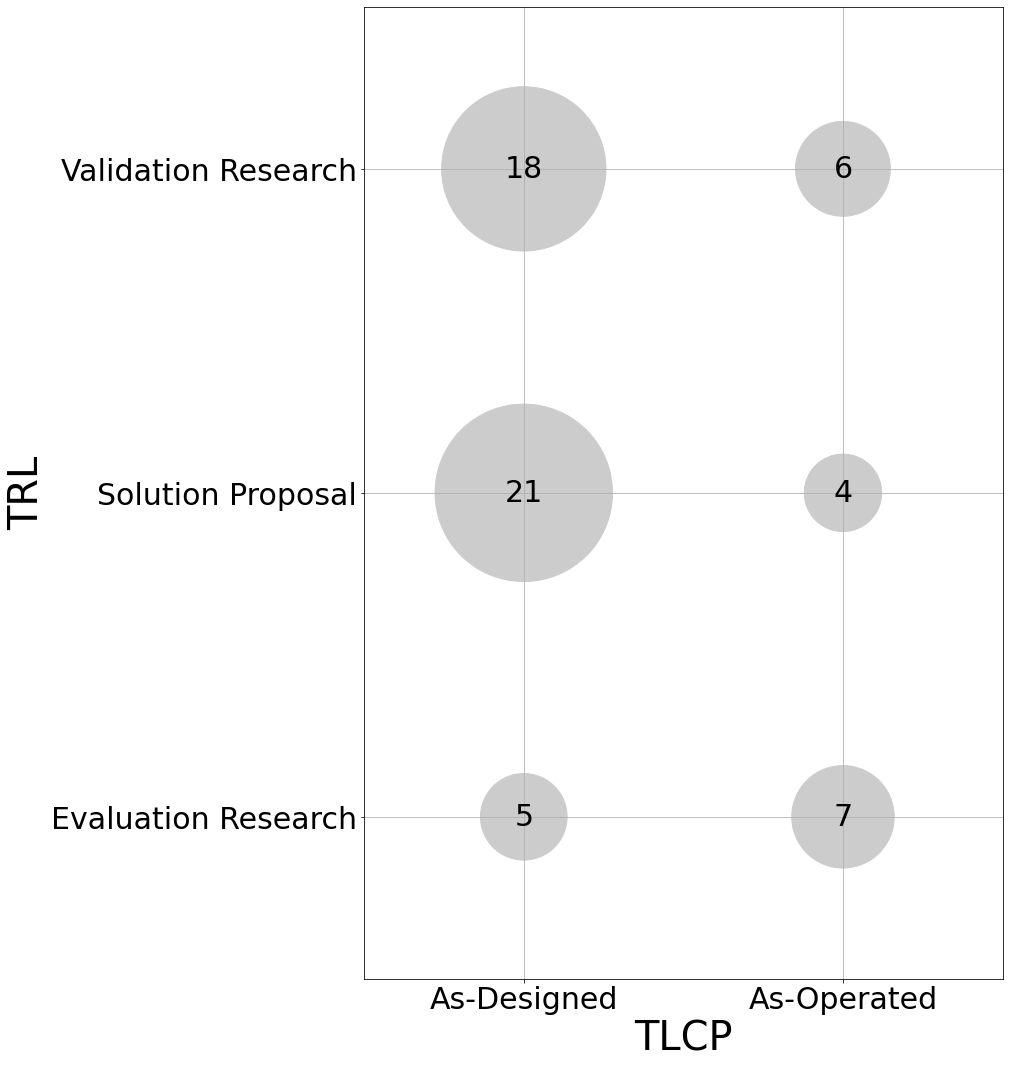

In [22]:
# TRL per TLCP
tlcp_trl_copy_scatter = tlcp_trl_copy[tlcs].transpose()
print(tlcp_trl_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(tlcp_trl_copy_scatter)
plt.xlabel("TLCP", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 2.5)
plt.savefig(destination_folder + "TLCP_TRL_scatter" + ".pdf")

technique    Code Generation  Model Interpretation  \
value                                                
As-Designed               33                    28   
As-Operated               11                    16   

technique    Model-to-Model \n Transformation  
value                                          
As-Designed                                32  
As-Operated                                13  


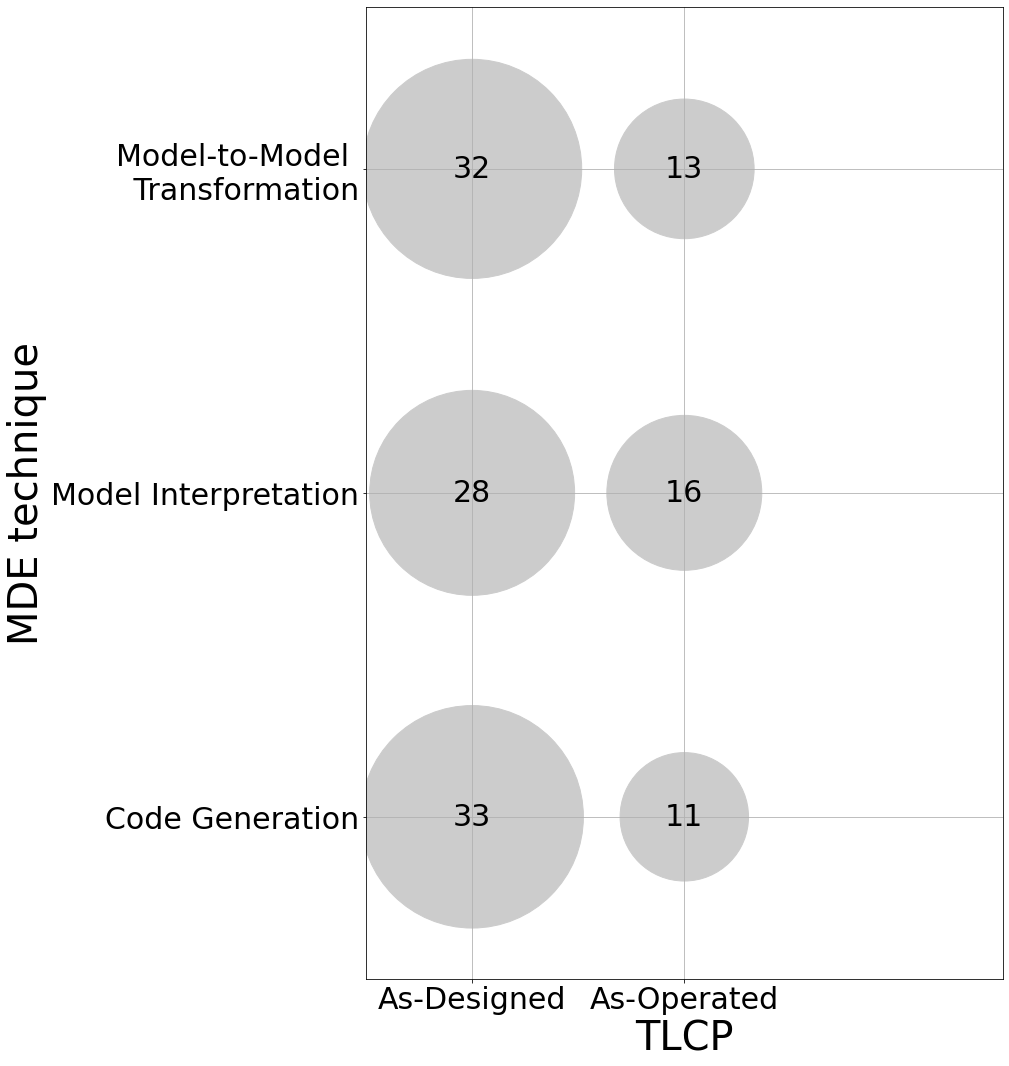

In [23]:
# MDE techniques per TLCP
twin_lcp_techniques_copy_scatter = twin_lcp_techniques_copy.astype('int64').unstack().transpose()
twin_lcp_techniques_copy_scatter = twin_lcp_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"})
print(twin_lcp_techniques_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(twin_lcp_techniques_copy_scatter)
plt.xlabel("TLCP", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 3.5)
plt.savefig(destination_folder + "TLCP_MDE_scatter" + ".pdf")

## System Lifecycle Phase

trl        Evaluation Research  Solution Proposal  Validation Research
value                                                                 
Design                       8                 12                   15
Implement                    8                 15                   28
Maintain                     0                  4                    1
No SLCP                      1                  8                    3
Operate                      9                 14                    8
Plan                         0                  1                    0
Test                         0                  0                    1


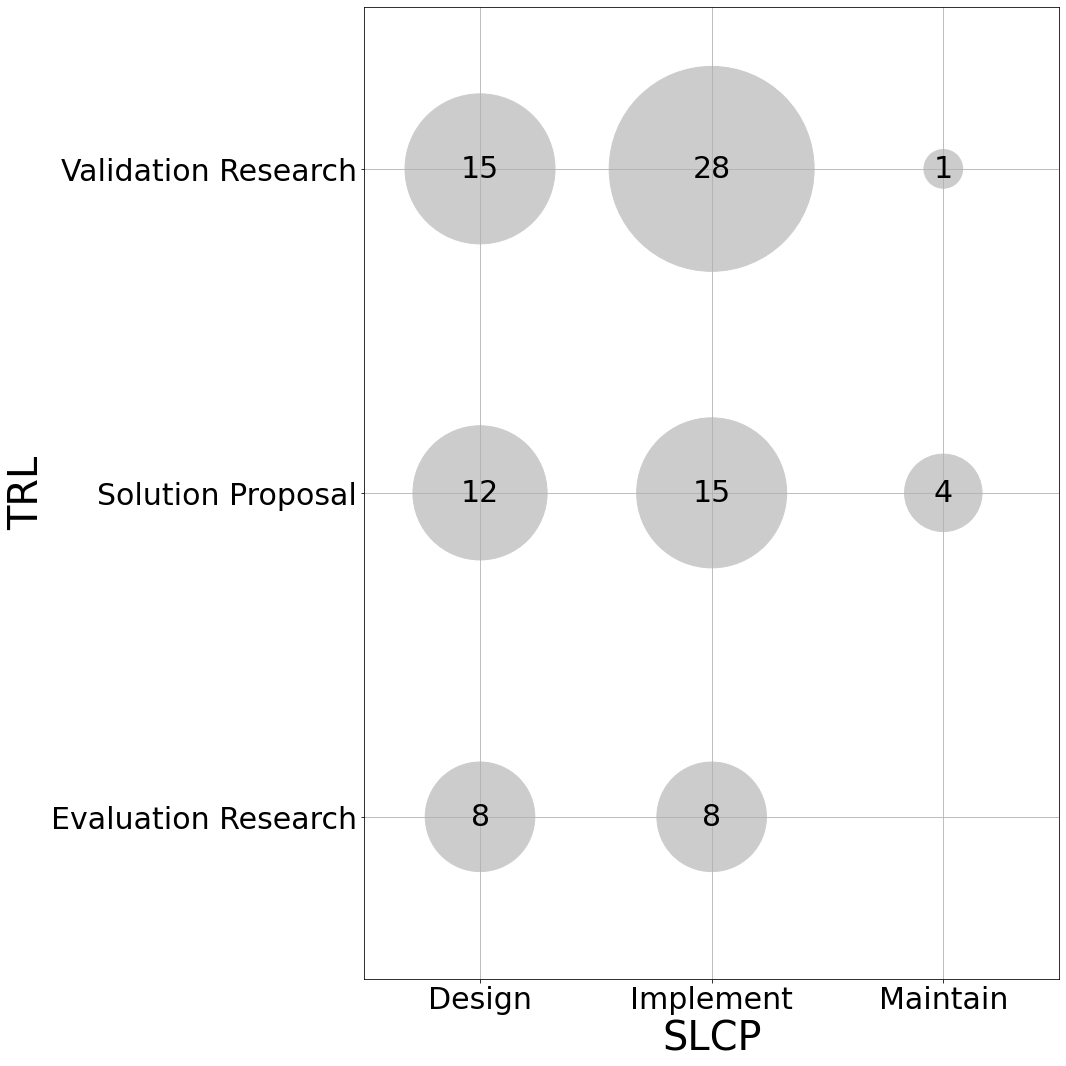

In [24]:
# TRL per SLCP
slcp_trl_copy_scatter = slcp_trl_copy.transpose()
print(slcp_trl_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(slcp_trl_copy_scatter)
plt.xlabel("SLCP", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 3.5)
plt.savefig(destination_folder + "SLCP_TRL_scatter" + ".pdf")

technique  Code Generation  Model Interpretation  \
value                                              
Design                   2                    13   
Implement               31                     8   
Operate                  5                    20   

technique  Model-to-Model \n Transformation  
value                                        
Design                                   20  
Implement                                12  
Operate                                   6  


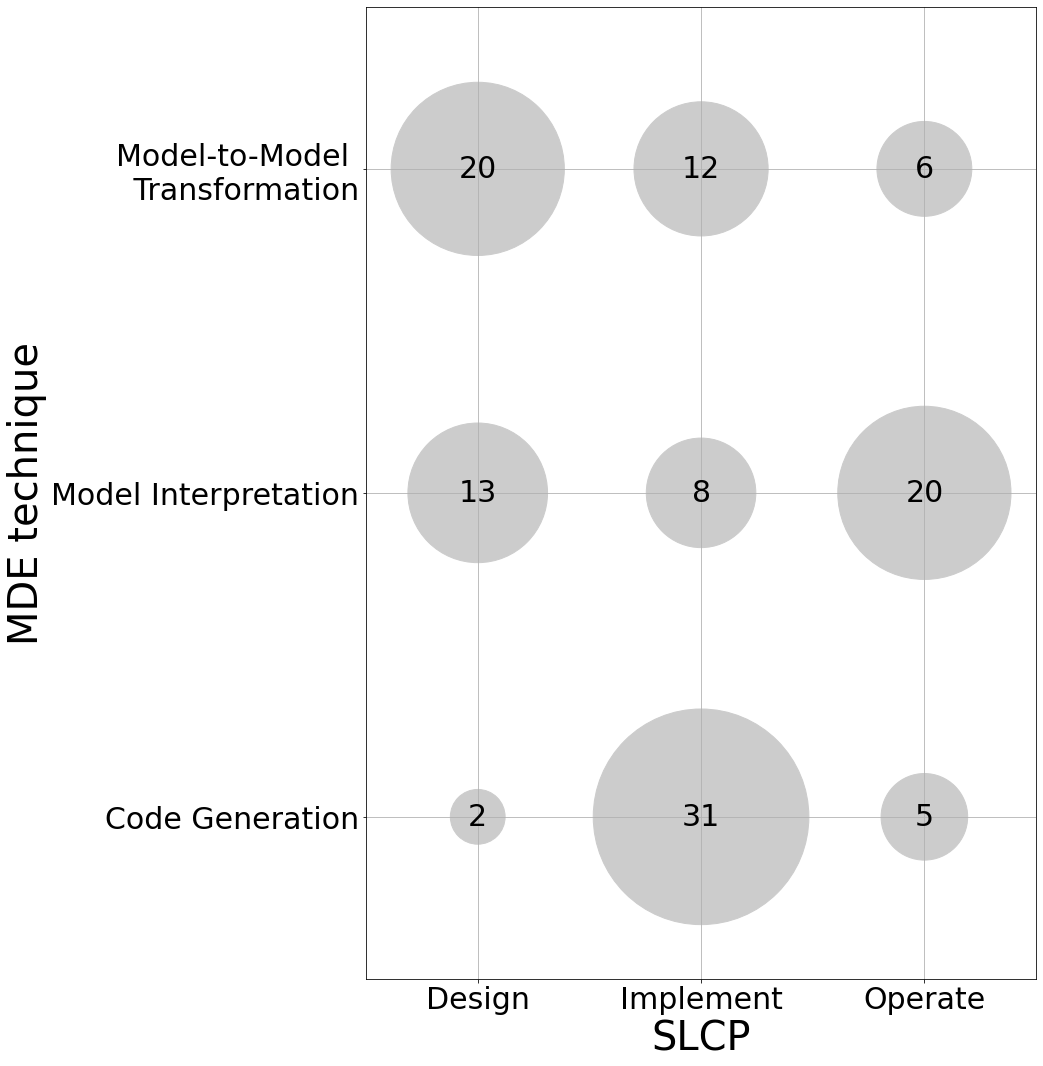

In [25]:
# MDE techniques per SLCP
system_lcp_techniques_copy_scatter = system_lcp_techniques_copy[['Design', 'Implement', 'Operate']].transpose()
system_lcp_techniques_copy_scatter = system_lcp_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"})
print(system_lcp_techniques_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(system_lcp_techniques_copy_scatter)
plt.xlabel("SLCP", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 3.5)
plt.savefig(destination_folder + "SLCP_MDE_scatter" +".pdf")

## SLCP VS TLCP

In [26]:
slcp_tlcp_copy = slcp_tlcp.__deepcopy__()
name = 'slcp_tlcp_scatter'
colname = ['system lifecycle phase', 'twin lifecycle phase']
slcp_tlcp_copy = slcp_tlcp_copy.groupby(['slcp', 'value']).size().unstack().fillna(0).astype('int64')

slcp_tlcp_copy = slcp_tlcp_copy.transpose()[['Design', 'Implement', 'Operate']]

value      As-Designed  As-Operated
slcp                               
Design              30            5
Implement           38           13
Operate             14           18


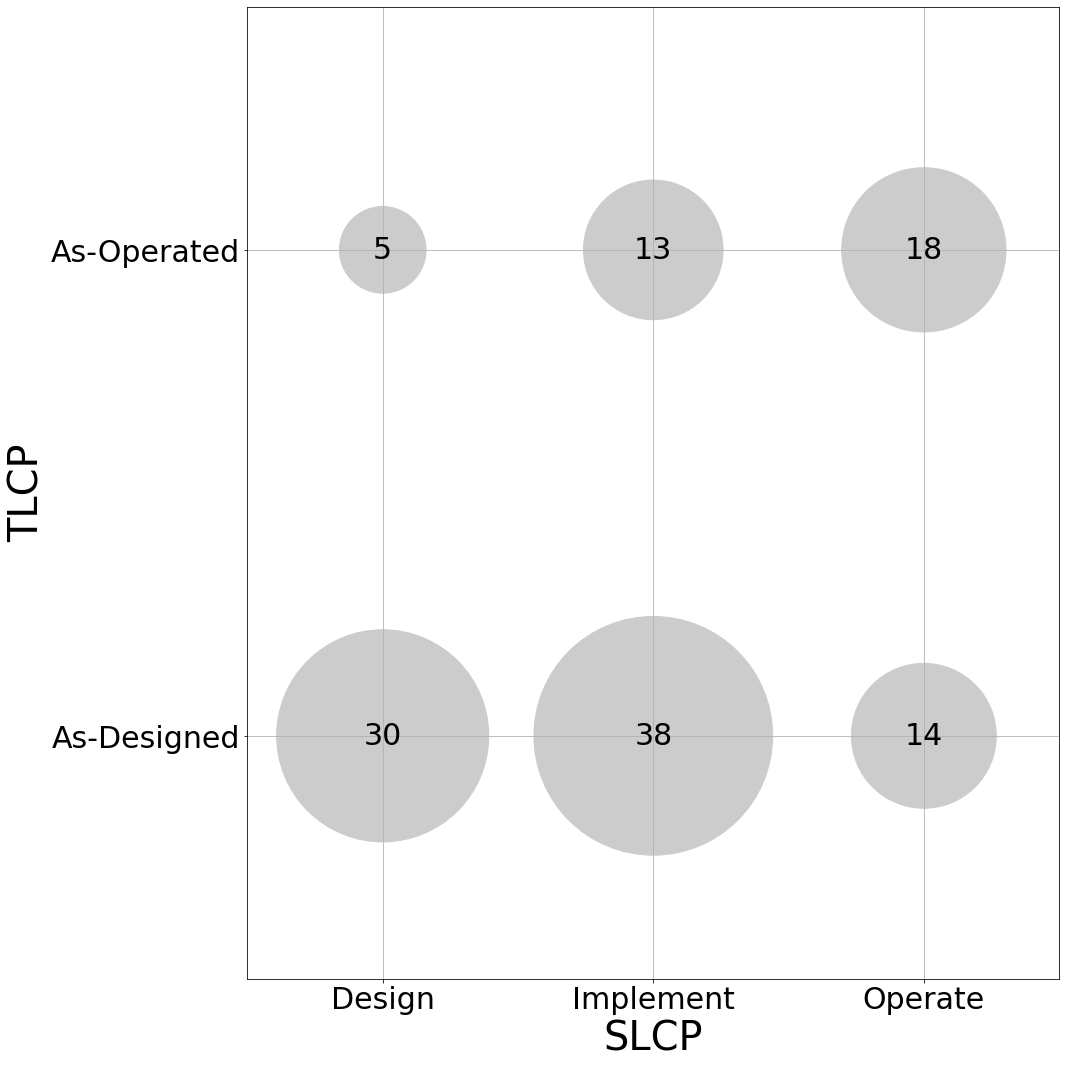

In [27]:
slcp_tlcp_copy_scatter = slcp_tlcp_copy.transpose()
print(slcp_tlcp_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(slcp_tlcp_copy_scatter)
plt.xlabel("SLCP", fontsize=40)
plt.ylabel("TLCP", fontsize=40)
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.tight_layout()
name = "slcp_tlcp_scatter"
plt.savefig(destination_folder + name + ".pdf")

# Scatterplots for RQ3

technique                   Code Generation  Model Interpretation  \
value                                                               
Accommodation                             9                     3   
Electricity                               2                     1   
Manufacturing                            13                    17   
Transportation and Storage                5                    10   

technique                   Model-to-Model \n Transformation  
value                                                         
Accommodation                                              9  
Electricity                                                5  
Manufacturing                                              9  
Transportation and Storage                                 0  


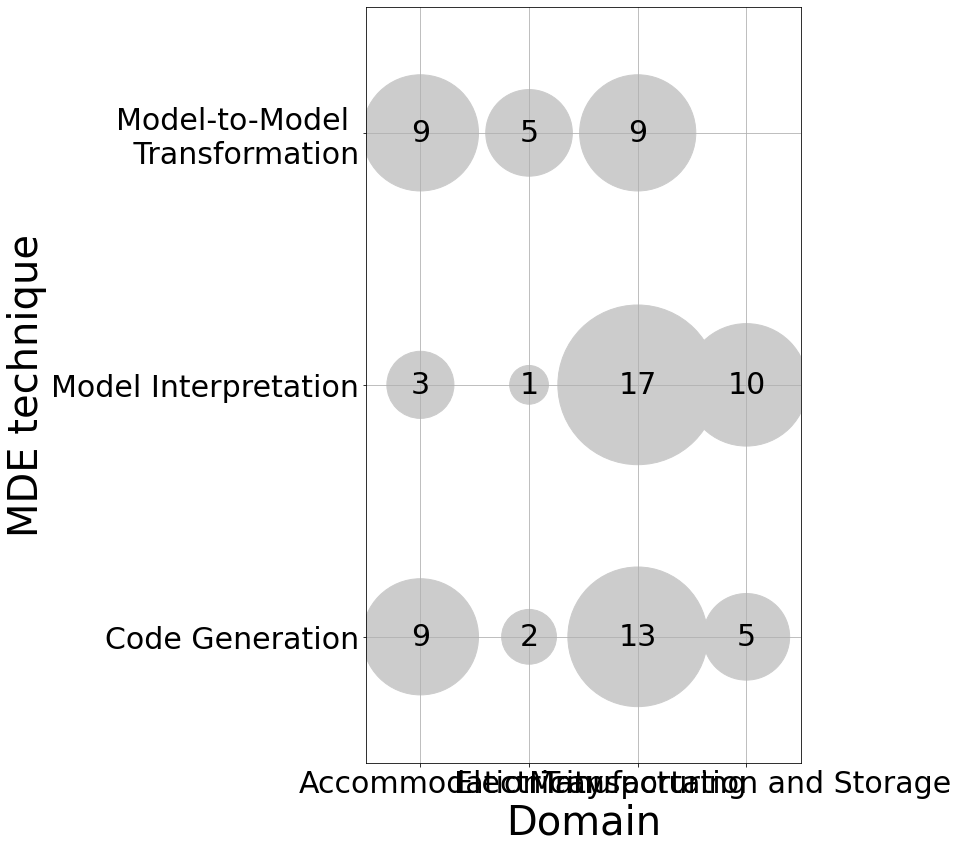

In [28]:
# MDE techniques per domain
domains_techniques_copy_scatter = domains_techniques_copy.transpose()
domains_techniques_copy_scatter = domains_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"})
print(domains_techniques_copy_scatter)
plt.figure(figsize=(13,12))
scatter_for_df(domains_techniques_copy_scatter)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 4.5)
plt.tight_layout()
plt.savefig(destination_folder + "Domain_MDE_scatter" + ".pdf")

value                       Individual Systems  No TT  Processes  \
use case domain                                                    
Accommodation                                6      0          1   
Electricity                                  4      0          0   
Manufacturing                               16      1          1   
Transportation and Storage                   8      1          0   

value                       Systems of Systems  
use case domain                                 
Accommodation                                2  
Electricity                                  1  
Manufacturing                                4  
Transportation and Storage                   3  


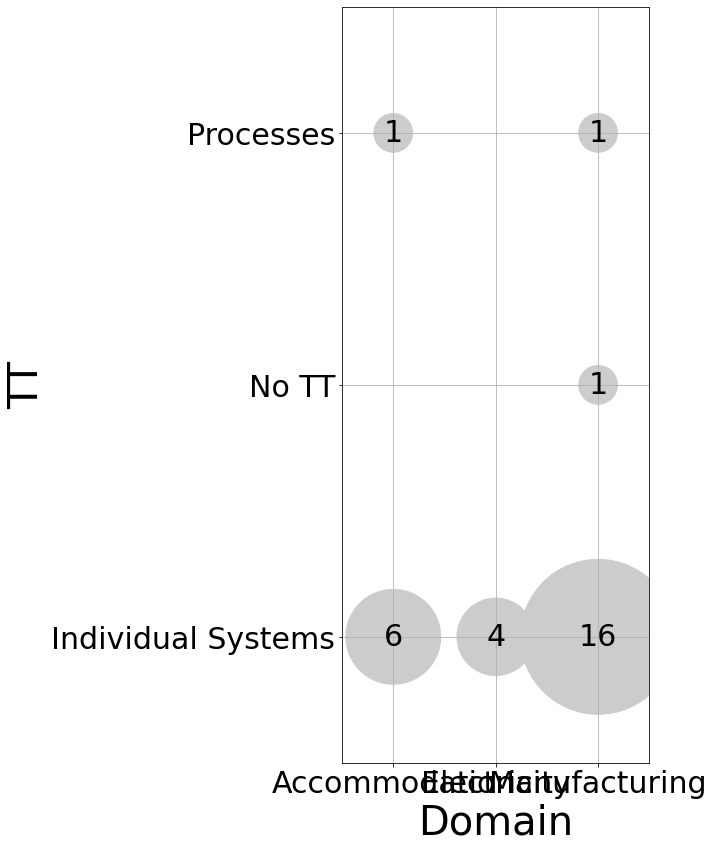

In [29]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_tt_copy = ucd_tt_copy
print(ucd_tt_copy)
plt.figure(figsize=(12,12))
scatter_for_df(ucd_tt_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("TT", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "Domain_TT_scatter" + ".pdf")

value                       As-Designed  As-Operated
use case domain                                     
Accommodation                         4            3
Electricity                           5            0
Manufacturing                        11            6
Transportation and Storage            8            3


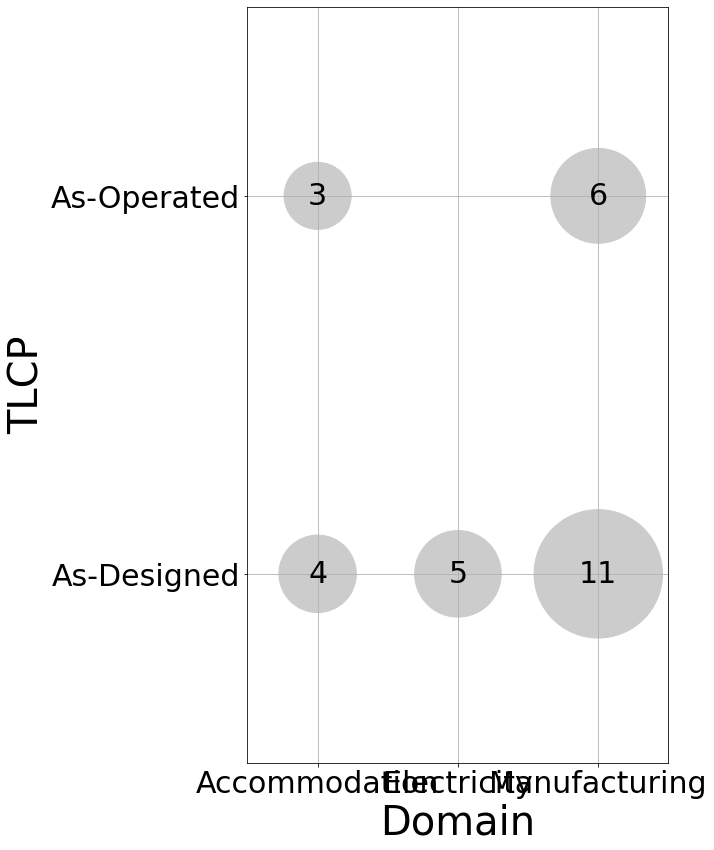

In [30]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_tlcp_copy = ucd_tlcp_copy
print(ucd_tlcp_copy)
plt.figure(figsize=(12,12))
size_multiplier = 2500
scatter_for_df(ucd_tlcp_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("TLCP", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + "Domain_TLCP_scatter" + ".pdf")

value                       Design  Implement  Operate
use case domain                                       
Accommodation                    5         14        2
Electricity                      2          5        1
Manufacturing                   11         15       12
Transportation and Storage       3          1        9


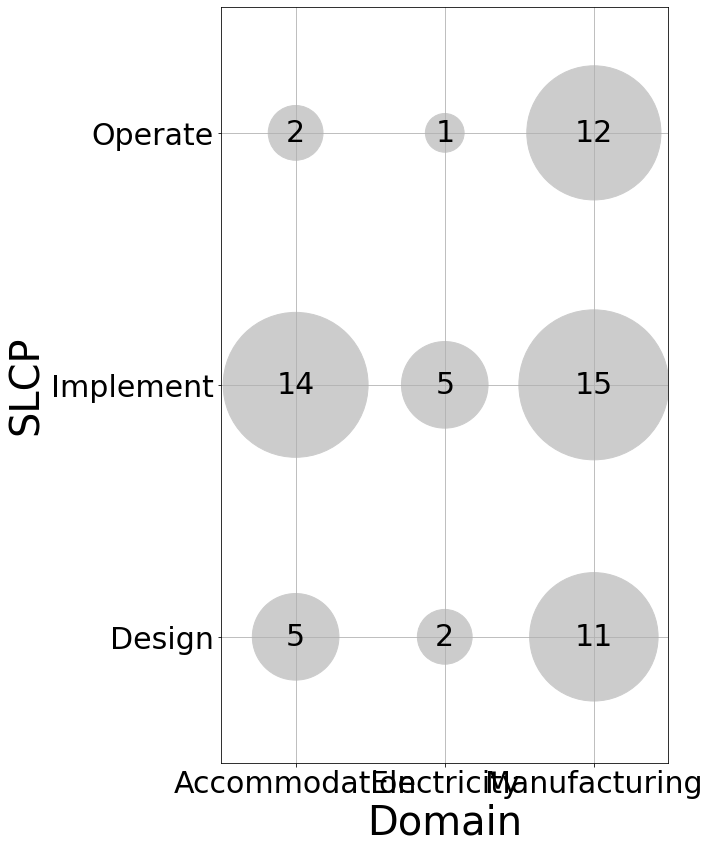

In [31]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_slcp_copy = ucd_slcp_copy
print(ucd_slcp_copy)
plt.figure(figsize=(12,12))
scatter_for_df(ucd_slcp_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("SLCP", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "Domain_SLCP_scatter" + ".pdf")

value                       Evaluation Research  Solution Proposal  \
use case domain                                                      
Accommodation                                 1                  2   
Electricity                                   0                  4   
Manufacturing                                 5                  2   
Transportation and Storage                    3                  6   

value                       Validation Research  
use case domain                                  
Accommodation                                 4  
Electricity                                   1  
Manufacturing                                10  
Transportation and Storage                    2  


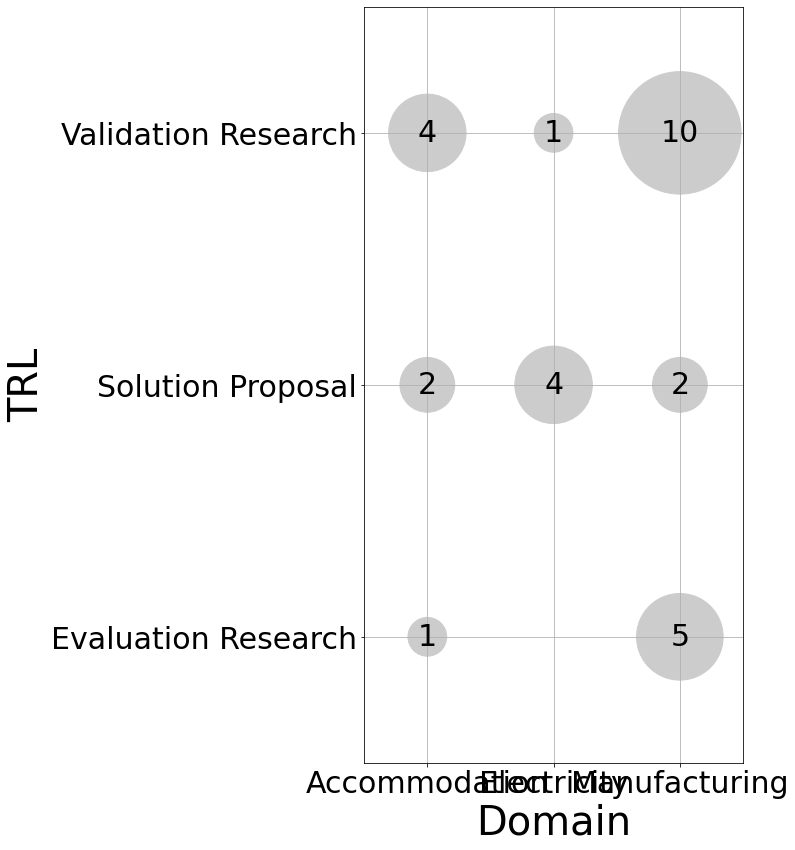

In [32]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_trl_copy = ucd_trl_copy
print(ucd_trl_copy)
plt.figure(figsize=(13,12))
size_multiplier = 2500
scatter_for_df(ucd_trl_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "Domain_TRL_scatter" + ".pdf")